In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [ ]:
# load dataset anime.csv

animes = pd.read_csv('anime.csv')
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
animes[['rating','members']].describe()

,rating,members
count,12064.000000,1.229400e+04
mean,6.473902,1.807134e+04
std,1.026746,5.482068e+04
min,1.670000,5.000000e+00
25%,5.880000,2.250000e+02
50%,6.570000,1.550000e+03
75%,7.180000,9.437000e+03
max,10.000000,1.013917e+06


In [ ]:
# group type berdasarkan statistika deskriptif

# quantile function 
def q25(x):
  return x.quantile(0.25)

def q75(x):
  return x.quantile(0.75)

# simple descriptive statistic
animes \
  .groupby('type')['rating']\
  .agg(['mean','std','min',q25,'median',q75,'max'])\
  .transpose() 

type,Movie,Music,ONA,OVA,Special,TV
mean,6.318058,5.588996,5.643298,6.375221,6.523501,6.902299
std,1.211988,0.958440,1.127091,0.858358,0.887762,0.863526
min,1.920000,3.280000,2.580000,2.000000,1.670000,2.670000
q25,5.420000,5.010000,4.870000,5.850000,6.085000,6.440000
median,6.470000,5.625000,5.755000,6.380000,6.630000,6.940000
q75,7.250000,6.152500,6.412500,6.920000,7.110000,7.460000
max,10.000000,8.380000,8.260000,9.250000,8.660000,9.600000


In [ ]:
# load rating.csv

ratings = pd.read_csv('rating.csv')
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Untuk kolom rating, jika user telah menggunakan layanan tapi tidak memberi rating pada kontennya, maka akan bernilai -1 

In [ ]:
# karena akan menggunakan collaborative dan rating merupakan hal yang penting, maka user yang tidak memberikan feedback (-1) diexclude

ratings = ratings[ratings['rating'] != -1]
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [ ]:
ratings.groupby('rating')['rating'].count()

rating
1       16649
2       23150
3       41453
4      104291
5      282806
6      637775
7     1375287
8     1646019
9     1254096
10     955715
Name: rating, dtype: int64

Terdapat 6337241 rating yang telah di post
**************************************************
Dari total 69600 unique user id
**************************************************
Dan total 12294 anime berbeda
**************************************************
Rata-rata rating anime per user adalah 91.05
**************************************************


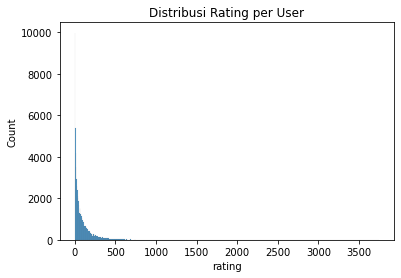

In [ ]:
# total ratings 
print('Terdapat', len(ratings['rating']), 'rating yang telah di post')
print('*'*50)
# total user
print('Dari total', str(len(ratings['user_id'].unique())), 'unique user id')
print('*'*50)
# total dari anime yang unique (dalam animes bukan ratings)
print('Dan total', str(len(animes['anime_id'].unique())), 'anime berbeda')
print('*'*50)
# rata-rata rating anime per user 
ratings_per_user = ratings.groupby('user_id')['rating'].count()
print('Rata-rata rating anime per user adalah', round(statistics.mean(ratings_per_user), ndigits=2))
print('*'*50)
# grafik histogram dari rata2 rating per user
plt.title('Distribusi Rating per User')
sns.histplot(ratings_per_user)
plt.show()

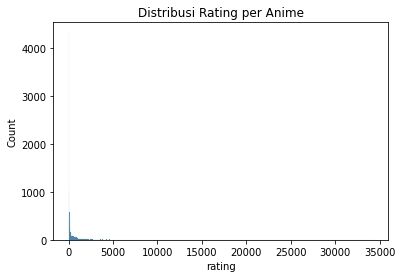

In [ ]:
# rata-rata rating anime
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()

# grafik histogram dari rata2 rating per anime
plt.title('Distribusi Rating per Anime')
sns.histplot(ratings_per_anime)
plt.show()

## Build Recommender

In [ ]:
# buat df untuk ratings_per_anime
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)

# hapus rating yang < 1000
filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df['rating'] >= 1000]

# buat list dari anime_id yang disimpan
popular_anime = filtered_ratings_per_anime_df.index.tolist()


In [ ]:
# buat df untuk ratings_per_user
ratings_per_user_df = pd.DataFrame(ratings_per_user)

# hapus rating yang < 500
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df['rating'] >= 500]

# buat list dari user_id yang disimpan
prolific_users = filtered_ratings_per_user_df.index.tolist()

In [ ]:
# menggabungkan anime yang populer dan user yang telah memberi rating >= 500

filtered_ratings = ratings[ratings['anime_id'].isin(popular_anime)]
filtered_ratings = ratings[ratings['user_id'].isin(prolific_users)]

len(filtered_ratings)

1005314

In [ ]:
# membuat matrix filtered_ratings

rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')
rating_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,9.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# mengubah NaN menjadi 0

rating_matrix = rating_matrix.fillna(0)
rating_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# mencari user yang sama 

from sklearn.metrics.pairwise import cosine_similarity
import operator

def similar_user(user_id, matrix, k = 3):
  # membuat df dari user yang sekarang
  user = matrix[matrix.index == user_id]

  # dan df dari user lainnya
  other_user = matrix[matrix.index != user_id]

  # kalkukasi cosine similarity antara user dan other_user
  similarities = cosine_similarity(user, other_user)[0].tolist()

  # membuat list index dari other_user
  indices = other_user.index.tolist()

  # membuat key/values pair dari index user dan similarity dari other user
  index_similarity = dict(zip(indices, similarities))

  # urut berdasarkan similarity
  index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
  index_similarity_sorted.reverse()

  # ambil k user dari parameter diatas
  top_user_similarities = index_similarity_sorted[:k]
  users = [u[0] for u in top_user_similarities]

  return users

In [ ]:
current_user = 226

similar_user_indices = similar_user(current_user, rating_matrix)
print(similar_user_indices)

[30773, 39021, 45603]


In [ ]:
# get recommendation

def recommend_item(user_index, similar_user_indices, matrix, items=5):

  # load vectors for similar users
  similar_users = matrix[matrix.index.isin(similar_user_indices)]
  # hitung rata2 rating antara 3 similar user
  similar_users = similar_users.mean(axis=0)
  # ubah kedalam df 
  similar_users_df = pd.DataFrame(similar_users, columns=['mean'])

  # load vector dari current user
  user_df = matrix[matrix.index == user_index]
  # transpose 
  user_df_transposed = user_df.transpose()
  # rename kolom menjadi rating
  user_df_transposed.columns = ['rating']
  # hapus semua baris selain yang bernilai 0, anime yang belum ditonton
  user_df_transposed = user_df_transposed[user_df_transposed['rating'] == 0]
  # jadikan list anime yang user belum tonton
  animes_unseen = user_df_transposed.index.tolist()

  # filter rata2 rating dari similar user hanya untuk anime yang current user belum tonton 
  similar_user_df_filtered = similar_users_df[similar_users_df.index.isin(animes_unseen)]
  # order the dataframe
  similar_user_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
  # tandai top n anime
  top_n_anime = similar_user_df_ordered.head(items)
  top_n_anime_indices = top_n_anime.index.tolist()
  # lookup index anime top n untuk mendapatkan namanya 
  anime_information = animes[animes['anime_id'].isin(top_n_anime_indices)]

  return anime_information
                                           

In [ ]:
recommend_item(current_user, similar_user_indices, rating_matrix)

,anime_id,name,genre,type,episodes,rating,members
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
39,12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620
87,10030,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.53,151561
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
184,7674,Bakuman.,"Comedy, Romance, Shounen",TV,25,8.35,246899


Berikut 5 rating tertinggi dari user yang sama yang belum pernah ditonton sebelumnya.